In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv(r"C:\Users\SAIKA PARVIN\Downloads\house-prices-advanced-regression-techniques\train.csv")  # Path to train.csv from Kaggle
test_df = pd.read_csv(r"C:\Users\SAIKA PARVIN\Downloads\house-prices-advanced-regression-techniques\test.csv")    # Path to test.csv from Kaggle



In [3]:
train_df['TotalBathrooms'] = train_df['FullBath'] + 0.5 * train_df['HalfBath']
test_df['TotalBathrooms'] = test_df['FullBath'] + 0.5 * test_df['HalfBath']

features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']
target = 'SalePrice'

In [4]:
train_df = train_df[features + [target]].dropna()
test_df = test_df[features].fillna(0)  # For submission, fill missing with 0



In [5]:
X = train_df[features]
y = train_df[target]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse:.2f}")


Validation RMSE: 53371.56


In [8]:
test_predictions = model.predict(test_df)

In [9]:

submission = pd.DataFrame({
    'Id': test_df.index + 1461,  # Kaggle test set starts from Id=1461
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created.")


Submission file 'submission.csv' created.


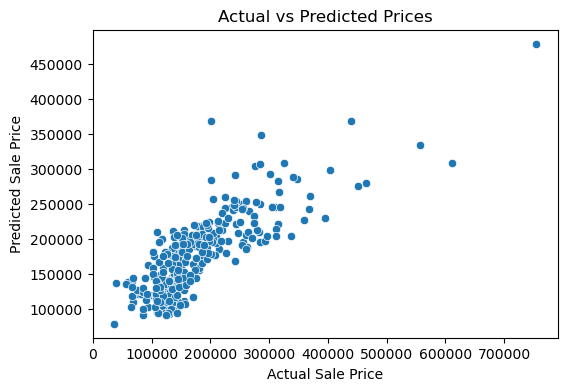

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Prices")
plt.show()
